In [1]:
do_simulate = False

In [2]:
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np

# Use your detector
#from neurokit2.ecg.ecg_findpeaks import _ecg_findpeaks_khamis

In [3]:
if do_simulate:
    fs = 500
    ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=fs)
else:
    import scipy.io
    matlab_file_path = '/Users/petercharlton/Downloads/new_downloads/MIMIC_PERform_1_min_normal.mat'
    mat_data = scipy.io.loadmat(matlab_file_path)  # Replace with your file path

    # Access the ECG signal and sampling frequency from the 'data' structure
    ecg_signal = mat_data['data']['ekg'][0,0]['v'][0][0]  # 'v' contains the ECG signal
    ecg_signal = np.array(list(ecg_signal.T[0]))
    fs = int(mat_data['data']['ekg'][0,0]['fs'][0][0][0][0])  # 'fs' contains the sampling frequency

In [4]:
signals, info = nk.ecg_peaks(ecg_signal, sampling_rate=fs, method='neurokit', correct_artifacts=False, show=False)
rpeaks = signals['ECG_R_Peaks']
rpeaks = np.where(rpeaks == 1)[0]

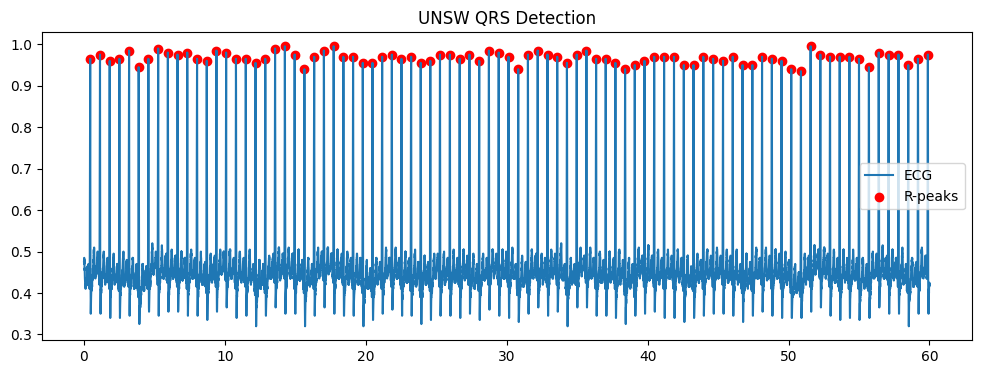

In [5]:
# Plot ECG and detected peaks
time = np.arange(len(ecg_signal)) / fs
plt.figure(figsize=(12, 4))
plt.plot(time, ecg_signal, label="ECG")
plt.scatter(time[rpeaks], ecg_signal[rpeaks], c='red', label="R-peaks")
plt.legend()
plt.title("UNSW QRS Detection")
#plt.xlim([0, 10])
plt.show()

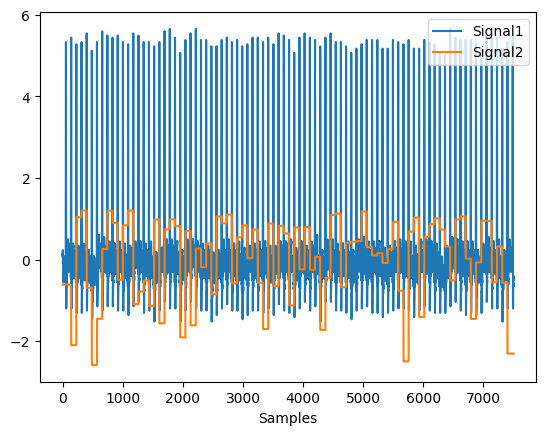

In [6]:
quality = nk.ecg_quality(ecg_signal, sampling_rate=fs, method="templatematch")
nk.signal_plot([ecg_signal, quality], standardize=True)

In [10]:
quality.max()

np.float64(0.9978975492157262)